In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [3]:
input_img = Input(shape=(784,))
encoded = Dense(32, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

In [4]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
epochs=50,
batch_size=256,
shuffle=True,
validation_data=(x_test, x_test))
test_loss = autoencoder.evaluate(x_test, x_test)
decoded_imgs = autoencoder.predict(x_test)

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
230/235 [============================>.] - ETA: 0s - loss: 0.2787WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x00000192D73FBEE8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the fu

In [5]:
threshold = 0.5
correct_predictions = np.sum(
np.where(x_test >= threshold, 1, 0) ==
np.where(decoded_imgs >= threshold, 1, 0)
)

total_pixels = x_test.shape[0] * x_test.shape[1]
test_accuracy = correct_predictions / total_pixels
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Test Loss: 0.09147875756025314
Test Accuracy: 0.9713765306122449


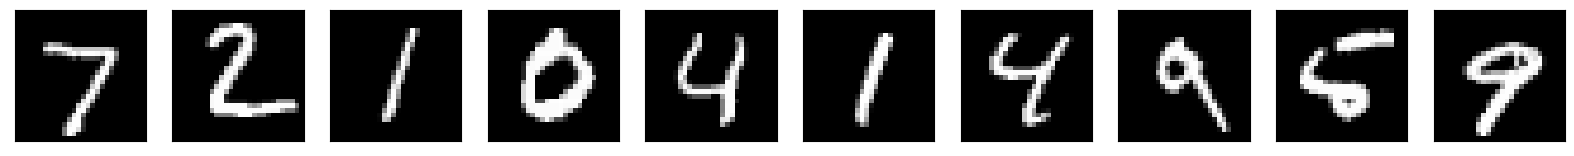

In [8]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
# Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

   

In [9]:
 # Display reconstruction with threshold
    ax = plt.subplot(2, n, i + 1 + n)
    reconstruction = decoded_imgs[i].reshape(28, 28)
    plt.imshow(np.where(reconstruction >= threshold, 1.0, 0.0))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.show()

IndentationError: unexpected indent (391276072.py, line 2)